In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from skimage import io
import os

In [2]:
# Define the logistic growth model
def area_logistic(t, a0, r, k):
    """
    t  :time
    a0 : area at time zer0
    r  : growth rate
    k  : carrying capacity
    """
    return k / (1 + (k/a0 - 1)*np.exp(-r*t))

def der1_area_logistic(t, a0, r, k):
    """
    t  :time
    a0 : area at time zer0
    r  : growth rate
    k  : carrying capacity
    """
    A = area_logistic(t, a0, r, k)
    return r*A*(1-A/k)

def der2_area_logistic(t, a0, r, k):
    """
    t  :time
    a0 : area at time zer0
    r  : growth rate
    k  : carrying capacity
    """
    A = area_logistic(t, a0, r, k)
    return (r**2)*A*(1-A/k)*(1-2*A/k)

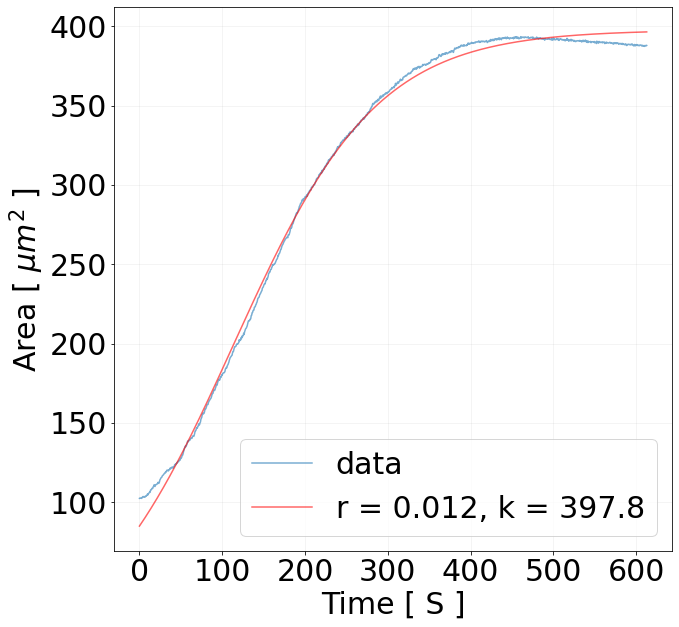

In [33]:
# Read the area curves table
df = pd.read_pickle('Results/manipulated_area_curves.pkl')

parameters_logistic_sopc2, parameters_Rlogistic_sopc2 = [], []
for i in [0]:
    # Increment the suffix
    j = i + 10
    # Read the time and area
    t, A = df['Time'][j], df['Area'][j]
    
    # Compute the maximum and minimum of the area
    area_max = np.max(A)
    area_min = np.min(A)
    
    # Fit a logistic growth function to the curves  k / (1 + (k/a0 - 1)*np.exp(-r*t)) with parameters a0, r, k
    popt_logistic, _  = curve_fit(area_logistic, t, A,
                                  p0=(1, 0.01, area_max),
                                  bounds=([0.1, 0.00001, area_min], [area_min, 10, 2*area_max]))
    
    
    # Append the fitted parameters to lists
    parameters_logistic_sopc2.append(popt_logistic)
    
    # Define the figure size only once
    plt.figure(figsize=(10,10))
    plt.plot(t, A, label='data', alpha = 0.6)                                                    # data
    plt.plot(t, area_logistic(t, *popt_logistic), label=f'r = {popt_logistic[1]:.3f}, k = {popt_logistic[2]:.1f}', alpha = 0.6, color= 'r')     # logistic
    # plt.title('Fitting the logistic growth curve on the data', fontsize=24)
    plt.xlabel('Time [ S ]', fontsize=30)
    plt.ylabel('Area [ $\mu m^2$ ]', fontsize=30)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.grid(color = 'gray', alpha = 0.1)
    plt.legend(loc='lower right', fontsize=30)
    plt.savefig('curve_logistic.svg')